In [9]:
import os
import json
import numpy as np
import pandas as pd
import sqlite3
import functools as ft
import matplotlib.pyplot as plt
%matplotlib inline 

# ETL Pipelines Tutorial

<strong> Files: </strong>
1. apps.xlsx 
2. ratings.csv
3. installs.json
4. reviews.sqlite

<strong> Question: What are the most profit categories? What makes application popular? </strong>

# Extract

##  Extracting data from excel file

In [10]:
apps = pd.read_excel('apps.xlsx')
apps

,App_Id,AppName,Price,Geners,Category
0,0,10 Best Foods for You,0.000000,Health & Fitness,Health And Fitness
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,.
2,2,11st,0.000000,Shopping,Shopping
3,3,1800 Contacts - Lens Store,0.000000,Medical,Medical
4,4,1LINE – One Line with One Touch,0.000000,Board,Game
...,...,...,...,...,...
851,813,Free Books - Spirit Fanfiction and Stories,0.000000,Books & Reference,Books And Reference
852,814,Free Dating & Flirt Chat - Choice of Love,0.000000,Dating,Dating
853,815,Free Dating App & Flirt Chat - Cheers,0.000000,Dating,Dating
854,816,Free Dating App & Flirt Chat - Match with Singles,0.000000,Dating,Dating


count the number of null values in the data set

In [11]:
apps.isnull().sum()

App_Id       0
AppName      0
Price        0
Geners       5
Category    37
dtype: int64

In [12]:
apps.shape

(856, 5)

##  Extracting data from csv file

In [13]:
ratings = pd.read_csv('ratings.csv')
ratings

,Unnamed: 0,App_Id,Rating,Rating_Count
0,0,0,4.0,7.785448e+06
1,1,0,4.0,7.785448e+06
2,2,0,4.0,7.785448e+06
3,3,0,4.0,7.785448e+06
4,4,0,4.0,7.785448e+06
...,...,...,...,...
99993,99995,632,4.5,7.785448e+06
99994,99996,632,4.5,7.785448e+06
99995,99997,632,4.5,7.785448e+06
99996,99998,632,4.5,7.785448e+06


In [14]:
# ratings.drop(columns=["Unnamed: 0"], inplace=True)
ratings.isnull().sum()

Unnamed: 0      0
App_Id          0
Rating          0
Rating_Count    0
dtype: int64

In [15]:
ratings.shape

(99998, 4)

##  Extracting data from JSON file

In [16]:
with open("installs.json", "r") as file:
    installs = json.load(file)
installs = pd.DataFrame(installs)
installs

,App_Id,Growth (30 days),Installs
0,0,31.150758,500000
1,0,31.150758,500000
2,App_Id,Growth (30 days),Installs
3,0,31.150758,500000
4,0,31.150758,500000
...,...,...,...
79995,634,31.150758,10000000
79996,634,31.150758,10000000
79997,634,31.150758,10000000
79998,634,31.150758,10000000


In [17]:
# pd.read_json(file)

In [18]:
installs.isna().sum()

App_Id              0
Growth (30 days)    0
Installs            0
dtype: int64

##  Extracting data from SQL table

In [19]:
#connection to the database 
conn = sqlite3.connect('reviews.sqlite')
cur = conn.cursor()
cur.execute('SELECT * FROM reviews')

# data = cur.fetchall()
# columns = list(map(lambda x: x[0], cur.description))

In [23]:
#run a query 
QUERY = '''
SELECT *
FROM reviews
'''
pd.read_sql(QUERY, conn)

,index,Unnamed: 0,App_Id,No_reviews_count,Reviews_present_count,Sentiment,Sentiment_Polarity,Reviews_Number
0,0,0,0,6.0000,194.00000,1.00000,1.000000,2.490000e+03
1,1,1,0,6.0000,194.00000,1.00000,1.000000,2.490000e+03
2,2,2,0,6.0000,194.00000,1.00000,0.250000,2.490000e+03
3,3,3,0,6.0000,194.00000,1.00000,0.250000,2.490000e+03
4,4,4,0,6.0000,194.00000,0.38841,0.161676,2.490000e+03
...,...,...,...,...,...,...,...,...
153467,153467,153468,11202,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153468,153468,153469,11203,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153469,153469,153470,11204,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153470,153470,153471,11205,46.4489,76.46874,0.38841,0.161676,1.049301e+06


In [20]:
#run a query 
QUERY = '''
SELECT App_Id, AVG(Sentiment) OVER(PARTITION BY App_Id) as Total
FROM reviews
'''
pd.read_sql(QUERY, conn)

,App_Id,Total
0,0,0.771652
1,0,0.771652
2,0,0.771652
3,0,0.771652
4,0,0.771652
...,...,...
153467,11202,0.388410
153468,11203,0.388410
153469,11204,0.388410
153470,11205,0.388410


In [21]:
#run a query 
QUERY = '''
SELECT *
FROM reviews
'''
pd.read_sql(QUERY, conn)

,index,Unnamed: 0,App_Id,No_reviews_count,Reviews_present_count,Sentiment,Sentiment_Polarity,Reviews_Number
0,0,0,0,6.0000,194.00000,1.00000,1.000000,2.490000e+03
1,1,1,0,6.0000,194.00000,1.00000,1.000000,2.490000e+03
2,2,2,0,6.0000,194.00000,1.00000,0.250000,2.490000e+03
3,3,3,0,6.0000,194.00000,1.00000,0.250000,2.490000e+03
4,4,4,0,6.0000,194.00000,0.38841,0.161676,2.490000e+03
...,...,...,...,...,...,...,...,...
153467,153467,153468,11202,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153468,153468,153469,11203,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153469,153469,153470,11204,46.4489,76.46874,0.38841,0.161676,1.049301e+06
153470,153470,153471,11205,46.4489,76.46874,0.38841,0.161676,1.049301e+06


In [22]:
pd.read_sql('SELECT AVG("Sentiment_Polarity") FROM reviews', conn)

,"AVG(""Sentiment_Polarity"")"
0,0.161676


># Before Transformation, Design Your Schema

# Transform

## Remove NULL Values / Imputing Data

In [25]:
apps.isna().sum()

App_Id      0
AppName     0
Price       0
Geners      0
Category    0
dtype: int64

In [27]:
apps.dropna(inplace=True)
apps.head()

,App_Id,AppName,Price,Geners,Category
0,0,10 Best Foods for You,0.000000,Health & Fitness,Health And Fitness
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,.
2,2,11st,0.000000,Shopping,Shopping
3,3,1800 Contacts - Lens Store,0.000000,Medical,Medical
4,4,1LINE – One Line with One Touch,0.000000,Board,Game


In [28]:
ratings.isna().sum()

Unnamed: 0      0
App_Id          0
Rating          0
Rating_Count    0
dtype: int64

In [29]:
ratings.head()

,Unnamed: 0,App_Id,Rating,Rating_Count
0,0,0,4.0,7.785448e+06
1,1,0,4.0,7.785448e+06
2,2,0,4.0,7.785448e+06
3,3,0,4.0,7.785448e+06
4,4,0,4.0,7.785448e+06


In [30]:
ratings.drop(columns=["Unnamed: 0"], inplace=True)
ratings

,App_Id,Rating,Rating_Count
0,0,4.0,7.785448e+06
1,0,4.0,7.785448e+06
2,0,4.0,7.785448e+06
3,0,4.0,7.785448e+06
4,0,4.0,7.785448e+06
...,...,...,...
99993,632,4.5,7.785448e+06
99994,632,4.5,7.785448e+06
99995,632,4.5,7.785448e+06
99996,632,4.5,7.785448e+06


In [31]:
ratings.drop_duplicates(inplace=True)
ratings

,App_Id,Rating,Rating_Count
0,0,4.000000,7.785448e+06
39,1,4.319059,7.785448e+06
41,2,3.800000,7.785448e+06
42,3,4.700000,7.785448e+06
507,4,4.600000,4.821550e+05
...,...,...,...
99121,629,3.900000,7.785448e+06
99128,630,4.500000,7.785448e+06
99507,631,4.600000,7.785448e+06
99667,632,4.500000,7.785448e+06


In [32]:
installs.head()

,App_Id,Growth (30 days),Installs
0,0,31.150758,500000
1,0,31.150758,500000
2,App_Id,Growth (30 days),Installs
3,0,31.150758,500000
4,0,31.150758,500000


In [33]:
errors = installs["App_Id"].str.extract(pat='(\w+)', expand=False) # find rows including words
errors

0           NaN
1           NaN
2        App_Id
3           NaN
4           NaN
          ...  
79995       NaN
79996       NaN
79997       NaN
79998       NaN
79999       NaN
Name: App_Id, Length: 80000, dtype: object

In [36]:
# "NOT" = ~
errors[~errors.isna()]

2    App_Id
Name: App_Id, dtype: object

In [39]:
# installs.drop(errors[~errors.isna()].index, inplace=True)
installs

,App_Id,Growth (30 days),Installs
0,0,31.150758,500000
1,0,31.150758,500000
3,0,31.150758,500000
4,0,31.150758,500000
5,0,31.150758,500000
...,...,...,...
79995,634,31.150758,10000000
79996,634,31.150758,10000000
79997,634,31.150758,10000000
79998,634,31.150758,10000000


## Remove Duplicates

In [ ]:
apps.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

99352

In [40]:
ratings.drop_duplicates(inplace=True)
# ratings.drop(columns=["Rating_Count"], inplace=True)
ratings.head()

,App_Id,Rating,Rating_Count
0,0,4.000000,7.785448e+06
39,1,4.319059,7.785448e+06
41,2,3.800000,7.785448e+06
42,3,4.700000,7.785448e+06
507,4,4.600000,4.821550e+05


In [41]:
installs.duplicated().sum()

79353

In [43]:
installs.drop_duplicates(inplace=True)
installs

,App_Id,Growth (30 days),Installs
0,0,31.150758,500000
58,1,31.150758,67546668.582792
60,2,31.150758,10000000
62,3,31.150758,1000000
84,4,0.8,10000000
...,...,...,...
78153,630,31.150758,10000
78160,631,31.150758,10000
78672,632,31.150758,50000
78676,633,31.150758,100000000


## Handling Dates

In [51]:
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [52]:
parsed_date.month

1

In [53]:
parsed_date.year

2017

In [54]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [48]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [49]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [50]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

## Dummy Variables

In this exercise, I'll create dummy variables from the projects data set. The idea is to transform categorical data like this:

| Project ID | Project Category |
|------------|------------------|
| 0          | Energy           |
| 1          | Transportation   |
| 2          | Health           |
| 3          | Employment       |

into new features that look like this:

| Project ID | Energy | Transportation | Health | Employment |
|------------|--------|----------------|--------|------------|
| 0          | 1      | 0              | 0      | 0          |
| 1          | 0      | 1              | 0      | 0          |
| 2          | 0      | 0              | 1      | 0          |
| 3          | 0      | 0              | 0      | 1          |



In [ ]:
apps

,App_Id,AppName,Price,Geners,Category
0,0,10 Best Foods for You,0.000000,Health & Fitness,Health And Fitness
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,.
2,2,11st,0.000000,Shopping,Shopping
3,3,1800 Contacts - Lens Store,0.000000,Medical,Medical
4,4,1LINE – One Line with One Touch,0.000000,Board,Game
...,...,...,...,...,...
851,813,Free Books - Spirit Fanfiction and Stories,0.000000,Books & Reference,Books And Reference
852,814,Free Dating & Flirt Chat - Choice of Love,0.000000,Dating,Dating
853,815,Free Dating App & Flirt Chat - Cheers,0.000000,Dating,Dating
854,816,Free Dating App & Flirt Chat - Match with Singles,0.000000,Dating,Dating


In [ ]:
pd.get_dummies(apps, columns=["Category"])

,App_Id,AppName,Price,Geners,Category_.,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,Category_Books And Reference,Category_Business,...,Category_Personalization,Category_Photography,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather
0,0,10 Best Foods for You,0.000000,Health & Fitness,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,11st,0.000000,Shopping,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1800 Contacts - Lens Store,0.000000,Medical,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1LINE – One Line with One Touch,0.000000,Board,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,813,Free Books - Spirit Fanfiction and Stories,0.000000,Books & Reference,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
852,814,Free Dating & Flirt Chat - Choice of Love,0.000000,Dating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
853,815,Free Dating App & Flirt Chat - Cheers,0.000000,Dating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,816,Free Dating App & Flirt Chat - Match with Singles,0.000000,Dating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



### replace() method

With pandas, you can use the replace() method to search for text and replace parts of a string with another string. If you know the exact string you're looking for, the replace() method is straight forward. For example, say you wanted to remove the string '(Trial)' from this data:

| data                     |
|--------------------------|
| '(Trial) Banking'        |
| 'Banking'                |
| 'Farming'                |
| '(Trial) Transportation' |

You could use `df['data'].replace('(Trial'), '')` to replace (Trial) with an empty string.

### regular expressions
What about this data?

| data                                           |
|------------------------------------------------|
| 'Other Industry; Trade and Services?$ab' |
| 'Other Industry; Trade and Services?ceg' |

This type of data is trickier. In this case, there's a pattern where you want to remove a string that starts with an exclamation point and then has an unknown number of characters after it. When you need to match patterns of character, you can use [regular expressions](https://en.wikipedia.org/wiki/Regular_expression).

The replace method can take a regular expression. So
df['data'].replace('?.+', regex=True) where '?.+' means find a set of characters that starts with a question mark is then followed by one or more characters. You can see a [regular expression cheat sheet](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285) here.


## Finding Outliers


In [55]:
# JOIN USING(App_Id)
merged = pd.merge(apps, ratings, on=["App_Id"])
merged

,App_Id,AppName,Price,Geners,Category,Rating,Rating_Count
0,0,10 Best Foods for You,0.000000,Health & Fitness,Health And Fitness,4.000000,7.785448e+06
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,.,4.319059,7.785448e+06
2,2,11st,0.000000,Shopping,Shopping,3.800000,7.785448e+06
3,3,1800 Contacts - Lens Store,0.000000,Medical,Medical,4.700000,7.785448e+06
4,4,1LINE – One Line with One Touch,0.000000,Board,Game,4.600000,4.821550e+05
...,...,...,...,...,...,...,...
641,629,E*TRADE Mobile,0.000000,Finance,Finance,3.900000,7.785448e+06
642,630,EMT Review Plus,11.990000,Medical,Medical,4.500000,7.785448e+06
643,631,EMT Tutor NREMT-B Study Guide,3.990000,Medical,Medical,4.600000,7.785448e+06
644,632,EMT-B Pocket Prep,0.000000,Medical,Medical,4.500000,7.785448e+06


In [58]:
merged.dtypes

App_Id            int64
AppName          object
Price           float64
Geners           object
Category         object
Rating          float64
Rating_Count    float64
dtype: object

Explore the data set to identify outliers using the Tukey rule.

<Axes: >

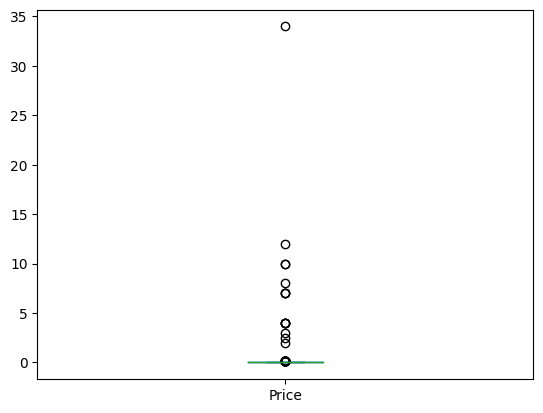

In [59]:
# merged.plot('Price',kind='box'); -- check what the f*** ?!?!?!
merged["Price"].plot(kind="box")

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [64]:
outliers = merged[['App_Id','Price']] # SELECT 

Q1 = outliers['Price'].quantile(0.25)
Q3 = outliers['Price'].quantile(0.75)

IQR = Q3 - Q1

# TUKEY: bandwidth: 1.5 outliers --> far...far...far..
bandwidth = 2.5

max_value = Q3 + bandwidth * IQR
min_value = Q1 - bandwidth * IQR

outliers = outliers[(outliers['Price'] > max_value) | (outliers['Price'] < min_value)]
outliers

,App_Id,Price
1,1,0.194687
18,18,0.194687
19,19,0.194687
29,29,33.990000
43,44,0.194687
68,68,7.990000
82,82,0.194687
144,144,0.194687
145,145,0.194687
175,175,9.990000


## Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.


In [ ]:
pass

# Load 

Map all transformation to your <strong>design</strong> and store it.

In [ ]:
merged_data = pd.merge(pd.merge(apps, ratings, on=["App_Id"]), installs, on=["App_Id"])
merged_data

,App_Id,AppName,Price,Geners,Category,Rating,Rating_Count,Growth (30 days),Installs
0,0,10 Best Foods for You,0.000000,Health & Fitness,Health And Fitness,4.000000,7.785448e+06,31.150758,500000
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.194687,.,.,4.319059,7.785448e+06,31.150758,67546668.582792
2,2,11st,0.000000,Shopping,Shopping,3.800000,7.785448e+06,31.150758,10000000
3,3,1800 Contacts - Lens Store,0.000000,Medical,Medical,4.700000,7.785448e+06,31.150758,1000000
4,4,1LINE – One Line with One Touch,0.000000,Board,Game,4.600000,4.821550e+05,0.8,10000000
...,...,...,...,...,...,...,...,...,...
705,629,E*TRADE Mobile,0.000000,Finance,Finance,3.900000,7.785448e+06,31.150758,1000000
706,630,EMT Review Plus,11.990000,Medical,Medical,4.500000,7.785448e+06,31.150758,10000
707,631,EMT Tutor NREMT-B Study Guide,3.990000,Medical,Medical,4.600000,7.785448e+06,31.150758,10000
708,632,EMT-B Pocket Prep,0.000000,Medical,Medical,4.500000,7.785448e+06,31.150758,50000


# What is the BIG problem with the above code ?? 

In [ ]:
SOURCE-TO-TARGET-MAPPING (STTM)